In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from statsmodels.tsa.arima.model import ARIMA
import warnings
import random as rd

In [201]:
df_flux = pd.read_csv(".\\..\dataset\\traindata_flux_compteurs.csv", sep = ",")
df_flux = df_flux.drop("Unnamed: 0", axis = 1)

df_flux["mois_annee_comptage"] = df_flux["mois_annee_comptage"].apply(lambda x: x[:-3])

## enlever 2023
df_flux = df_flux.drop(df_flux.index[df_flux["mois_annee_comptage"]== "2023-01"], axis = 0)


In [192]:
print(set(df_flux.name))


{'90 Rue De Sèvres', '21 boulevard Auguste Blanqui', '2 avenue de la Porte de Bagnolet', '129 Rue Lecourbe SO-NE', 'Face au 8 avenue de la porte de Charenton', 'Pont National', '28 boulevard Diderot', '33 avenue des Champs Elysées NO-SE', '72 boulevard Richard Lenoir  S-N', "180 avenue d'Italie", '7 avenue de la Grande Armée', "18 quai de l'Hôtel de Ville", '89 boulevard de Magenta NO-SE', '10 boulevard Auguste Blanqui NE-SO', 'Face au 4 avenue de la porte de Bagnolet', '72 avenue de Flandre SO-NE', '7 Avenue de la Grande Armée NO-SE', 'pont des Invalides N-S', '27 boulevard Diderot', 'Pont des Invalides', 'Voie Georges Pompidou', '77 boulevard Richard Lenoir N-S', '77 boulevard Richard Lenoir', '21 Boulevard Auguste Blanqui SO-NE', '33 avenue des Champs Elysées', '20 Avenue de Clichy', '105 Rue La Fayette E-O', '100 rue La Fayette', "147 avenue d'Italie", '16 avenue de la Porte des Ternes', "Face 104 Rue d'Aubervilliers", '6 rue Julia Bartet', 'Pont des Invalides S-N', '74 Boulevard O

In [196]:
street_name = "Totem 73 boulevard de Sébastopol"
df_exemple = df_flux[df_flux["name"] == street_name]
df_exemple.index = df_exemple["mois_annee_comptage"]
# df_exemple = df_exemple.drop(["mois_annee_comptage", "name"], axis = 1)
df_exemple

,name,mois_annee_comptage,sum_counts
mois_annee_comptage,,,
2020-02,Totem 73 boulevard de Sébastopol,2020-02,123602.0
2020-03,Totem 73 boulevard de Sébastopol,2020-03,127046.0
2020-04,Totem 73 boulevard de Sébastopol,2020-04,47467.0
2020-05,Totem 73 boulevard de Sébastopol,2020-05,214915.0
2020-06,Totem 73 boulevard de Sébastopol,2020-06,372134.0
2020-07,Totem 73 boulevard de Sébastopol,2020-07,381476.0
2020-08,Totem 73 boulevard de Sébastopol,2020-08,257917.0
2020-09,Totem 73 boulevard de Sébastopol,2020-09,431414.0
2020-10,Totem 73 boulevard de Sébastopol,2020-10,327193.0


In [74]:
def get_train_test(pd_data):

    train_size = int(len(pd_data) * 0.90)
    train, test = pd_data['sum_counts'][0:train_size], pd_data['sum_counts'][train_size:]

    return test, train

In [75]:
def pred_nombre_velos(y_train, y_test):
    ARIMAmodel = ARIMA(y_train, order = (12, 2, 2))
    ARIMAmodel.initialize_approximate_diffuse()
    ARIMAmodel = ARIMAmodel.fit()

    y_pred = ARIMAmodel.predict(start=len(y_train), end=len(y_test) + len(y_train)-1)

    return y_pred

def pred_nombre_velos_full(y_train, y_test):
    ARIMAmodel = ARIMA(y_train, order = (12, 2, 2))
    ARIMAmodel.initialize_approximate_diffuse()
    ARIMAmodel = ARIMAmodel.fit()

    y_pred = ARIMAmodel.predict(start=0, end=len(y_test) + len(y_train)-1)

    return y_pred


In [197]:
y_test, y_train = get_train_test(df_exemple)

print(y_test)
# print(y_train)

warnings.filterwarnings("ignore")
predictions= pred_nombre_velos(y_train, y_test)
predictions_full = pred_nombre_velos_full(y_train, y_test)


print(predictions)

# print(predictions_full)



mois_annee_comptage
2022-09    466063.0
2022-10    466336.0
2022-11    406347.0
2022-12    274791.0
Name: sum_counts, dtype: float64
32    352137.630732
33    332790.082309
34    297566.191771
35    300609.731576
Name: predicted_mean, dtype: float64


# Visualisation des prédictions

Text(0, 0.5, 'Nb de vélos')

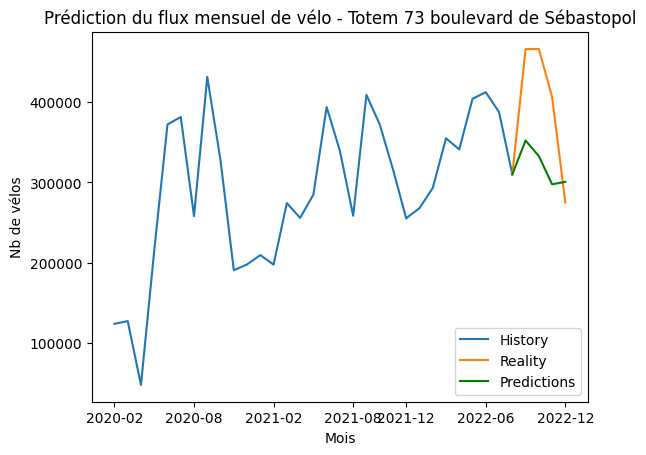

In [199]:
fig= plt.figure()
ax = fig.add_subplot(111)

ax.plot(y_train.index, y_train.values, label = 'History')
ax.plot([y_train.index[-1]] + list(y_test.index), [y_train.values[-1]] + list(y_test.values), label = 'Reality')
ax.plot([y_train.index[-1]] + list(y_test.index), [y_train.values[-1]] + list(predictions.values), color='Green', label = 'Predictions')
# plt.plot(df_exemple["mois_annee_comptage"],  list(predictions_full), color='Red', label = 'ARIMA Predictions')

plt.title('Prédiction du flux mensuel de vélo - '+ street_name)
ax.legend()

xticks =np.array(df_exemple.index)[np.round(np.linspace(0, len(y_train) + len(y_test) - 1, 7)).astype(int)]
ax.set_xticks(xticks)

plt.xlabel('Mois')
plt.ylabel('Nb de vélos')


# Tuning Parameters

In [12]:
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\guilh\AppData\Local\Temp\ipykernel_18164\526722019.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [8]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.90)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [9]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [28]:

# evaluate parameters
p_values = [10, 12]
d_values = range(2, 6)
q_values = range(2, 6)
warnings.filterwarnings("ignore")
evaluate_models(df_exemple["sum_counts"].values, p_values, d_values, q_values)

ARIMA(10, 2, 2) RMSE=609382870.078
ARIMA(10, 2, 3) RMSE=1250148698.832
ARIMA(10, 2, 4) RMSE=1978685374.438
ARIMA(10, 2, 5) RMSE=4059410337.284
ARIMA(10, 3, 2) RMSE=1891000462.432
ARIMA(10, 3, 3) RMSE=2543271863.337
ARIMA(10, 3, 4) RMSE=1758490524.614
ARIMA(10, 3, 5) RMSE=37270919600743.969
ARIMA(10, 4, 2) RMSE=1480531055.197
ARIMA(10, 4, 3) RMSE=1700571551.354
ARIMA(10, 4, 4) RMSE=2445473475.816
ARIMA(10, 4, 5) RMSE=1181271118.256
ARIMA(10, 5, 2) RMSE=1117591747.328
ARIMA(10, 5, 3) RMSE=906987938.112
ARIMA(10, 5, 4) RMSE=1769815039.688
ARIMA(10, 5, 5) RMSE=67802612948931780608.000
ARIMA(12, 2, 2) RMSE=343600004.670
ARIMA(12, 2, 3) RMSE=561917773.564
ARIMA(12, 2, 4) RMSE=771940133.303
ARIMA(12, 3, 2) RMSE=614143374.376
ARIMA(12, 3, 3) RMSE=726306929.936
ARIMA(12, 3, 4) RMSE=1472964479.972
ARIMA(12, 3, 5) RMSE=37268815359721.391
ARIMA(12, 4, 2) RMSE=1653173295.632
ARIMA(12, 4, 3) RMSE=2692260449.199
ARIMA(12, 4, 4) RMSE=2595543587.740
ARIMA(12, 4, 5) RMSE=1403714510.813
ARIMA(12, 5, 2) R

# Prédiction du futur (année 2023)

In [102]:
def pred_future_nombre_velos(y_train, length_predictions):
    ARIMAmodel = ARIMA(y_train, order = (12, 2, 2))
    ARIMAmodel.initialize_approximate_diffuse()
    ARIMAmodel = ARIMAmodel.fit()

    y_pred = ARIMAmodel.predict(start=len(y_train), end=length_predictions + len(y_train)-1)

    return y_pred

def pred_full_future_nombre_velos(y_train, length_predictions):
    ARIMAmodel = ARIMA(y_train, order = (12, 2, 2))
    ARIMAmodel.initialize_approximate_diffuse()
    ARIMAmodel = ARIMAmodel.fit()

    y_pred = ARIMAmodel.predict(start=0, end=length_predictions + len(y_train)-1)

    return y_pred

In [219]:
def predict_one_street_for_2023(df_flux, street_name):
    df_exemple = df_flux[df_flux["name"] == street_name]
    df_exemple.index = df_exemple["mois_annee_comptage"]

    if not (df_exemple.index[-1] == "2022-12"):
        raise ValueError("no Data for december 2022") 

    predictions= pred_future_nombre_velos(df_exemple["sum_counts"], 12 )
    predictions_full = pred_full_future_nombre_velos(df_exemple["sum_counts"], 12)

    return df_exemple, predictions, predictions_full


In [160]:
year_2023 = ['2023-01', 
            '2023-02', 
            '2023-03', 
            '2023-04', 
            '2023-05', 
            '2023-06', 
            '2023-07', 
            '2023-08', 
            '2023-09', 
            '2023-10', 
            '2023-11', 
            '2023-12']

In [172]:
def visualize_future_one_street(df_exemple, street_name, predictions, predictions_full):
    fig= plt.figure()
    ax = fig.add_subplot(111)

    dates = np.concatenate((df_exemple.index , year_2023), axis = 0)

    ax.plot(df_exemple.index, df_exemple.values, label = 'History')
    ax.plot([df_exemple.index[-1]] + year_2023, [df_exemple.values[-1]] + list(predictions.values), color='Green', label = 'Prediction')
    # ax.plt.plot(dates,  list(predictions_full.values), color='Red', label = 'Predictions')

    plt.title('Prédiction du flux mensuel de vélo - '+ street_name)
    ax.legend()

    xticks=np.array(dates)[np.round(np.linspace(0, len(dates) - 1, 7)).astype(int)]
    ax.set_xticks(xticks)

    plt.xlabel('Mois')
    plt.ylabel('Nb de vélos')

Totem 73 boulevard de Sébastopol
2022-12
36    345590.274283
37    325178.457104
38    309749.152204
39    310193.523109
40    399068.286708
41    431718.421503
42    395703.985139
43    345506.851953
44    365719.679184
45    429379.647253
46    392738.763929
47    344491.434732
Name: predicted_mean, dtype: float64


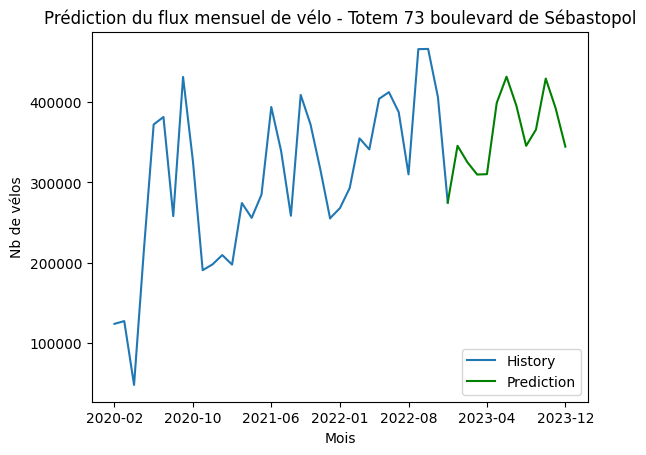

In [195]:
street_name = rd.choices(list(set(df_flux.name)))[0]
street_name = "Voie Georges Pompidou"
street_name = "152 boulevard du Montparnasse"
street_name = "67 boulevard Voltaire SE-NO"
street_name = "Totem 73 boulevard de Sébastopol"

print(street_name)

df_exemple, predictions, predictions_full = predict_one_street_for_2023(df_flux, street_name )

predictions = predictions.apply(lambda x : 0 if x <= 0 else x )
predictions_full = predictions_full.apply(lambda x : 0 if x <= 0 else x )
print(predictions)

visualize_future_one_street(df_exemple["sum_counts"], street_name, predictions, predictions_full)

In [233]:
def predict_all_for_2023(df_flux, year_2023):
    street_names = list(set(df_flux.name))
    predictions = np.zeros((len(street_names), len(year_2023)))
    print(predictions)
    for index, street_name in enumerate(street_names):
        print(index*100/len(street_names), '%')
        try:
            _, pred_for_street, _ = predict_one_street_for_2023(df_flux, street_name)
            pred_for_street = pred_for_street.apply(lambda x : 0 if x <= 0 else x )
            predictions[index] = round(pred_for_street)
        except:
            pass
    df = pd.DataFrame(data = predictions, index = street_names, columns = year_2023, dtype=int )
    df.index.name = "street_name"
    return df

In [234]:
df = predict_all_for_2023(df_flux, year_2023)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.0 %
0.6622516556291391 %
1.3245033112582782 %
1.9867549668874172 %
2.6490066225165565 %
3.3112582781456954 %
3.9735099337748343 %
4.635761589403973 %
5.298013245033113 %
5.960264900662252 %
6.622516556291391 %
7.28476821192053 %
7.947019867549669 %
8.609271523178808 %
9.271523178807946 %
9.933774834437086 %
10.596026490066226 %
11.258278145695364 %
11.920529801324504 %
12.582781456953642 %
13.245033112582782 %
13.907284768211921 %
14.56953642384106 %
15.2317880794702 %
15.894039735099337 %
16.556291390728475 %
17.218543046357617 %
17.880794701986755 %
18.543046357615893 %
19.205298013245034 %
19.867549668874172 %
20.52980132450331 %
21.192052980132452 %
21.85430463576159 %
22.516556291390728 %
23.178807947019866 %
23.841059602649008 %
24.503311258278146 %
25.165562913907284 %
25.827814569536425 %
26.490066225165563 %
27.1523178807

In [235]:
df.to_csv('.\\..\dataset\preds_flux_2023.csv',  index = True)

df


,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
street_name,,,,,,,,,,,,
90 Rue De Sèvres,17823,31049,36491,0,8819,9481,4598,0,0,0,0,0
21 boulevard Auguste Blanqui,7484,4224,0,0,0,0,0,0,0,0,0,0
2 avenue de la Porte de Bagnolet,0,0,0,0,0,0,0,0,0,0,0,0
129 Rue Lecourbe SO-NE,0,0,0,0,0,0,0,0,0,0,0,0
Face au 8 avenue de la porte de Charenton,27516,23462,21115,17506,18979,13725,8830,4246,4085,1546,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
132 rue Lecourbe,8331,3466,0,0,0,0,0,0,0,0,0,0
89 boulevard de Magenta,23957,0,0,0,0,0,0,0,0,0,0,0
Face au 16 Avenue de la Porte des Ternes O-E,0,0,0,0,0,0,0,0,0,0,0,0
